In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def logistic(t, N0=1000, r=1, K=10000):
    return K*N0*np.exp(r*t)/(K + N0*(np.exp(r*t) - 1))

In [3]:
rlin = np.linspace(0.9, 1.1, 1000)

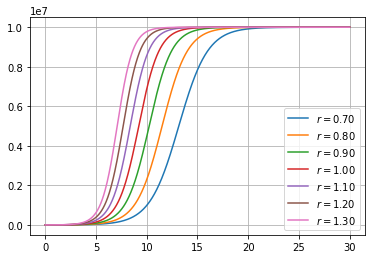

In [4]:
tlin = np.linspace(0, 30, 1000)
fig, axe = plt.subplots()
for r in np.arange(0.7, 1.31, 0.1):
    axe.plot(tlin, logistic(tlin, r=r, K=10e6), label=r"$r=%.2f$" % r)
axe.legend(loc="lower right")
axe.grid()

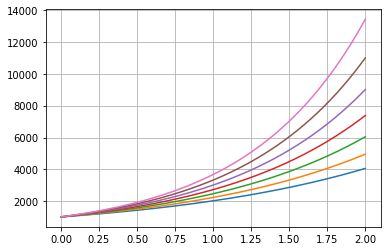

In [5]:
tlin = np.linspace(0, 2, 1000)
fig, axe = plt.subplots()
for r in np.arange(0.7, 1.31, 0.1):
    axe.plot(tlin, logistic(tlin, r=r, K=10e6), label=r"$r=%.2f$" % r)
#axe.legend(loc="lower right")
axe.grid()

In [6]:
norm = stats.norm(scale=0.1, loc=1.0)
rdist = norm.rvs(size=100000)

In [7]:
Ndist = logistic(t=20, r=rdist, K=10e6)

In [8]:
Ndist

array([9999552.36774363, 9999837.39491499, 9999547.79713132, ...,
       9998437.36159709, 9999819.01608506, 9999764.64522566])

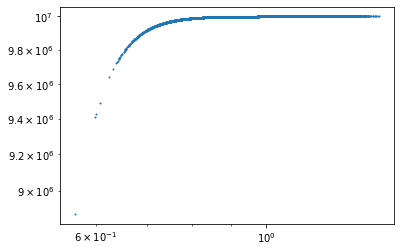

In [9]:
fig, axe = plt.subplots()
axe.loglog(rdist, Ndist, ".", markersize=2)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.4000e+01, 6.2000e+01, 9.9919e+04]),
 array([8874125.71677487, 8986713.13842175, 9099300.56006862,
        9211887.9817155 , 9324475.40336237, 9437062.82500925,
        9549650.24665612, 9662237.668303  , 9774825.08994987,
        9887412.51159675, 9999999.93324362]),
 <BarContainer object of 10 artists>)

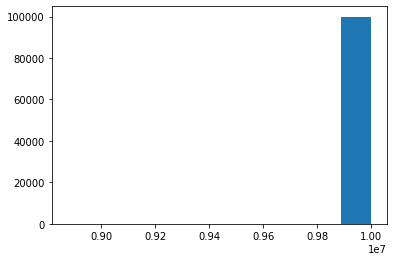

In [10]:
fig, axe = plt.subplots()
axe.hist(Ndist)

In [11]:
Nbins = np.logspace(2.9, 7.1, 200, base=10)

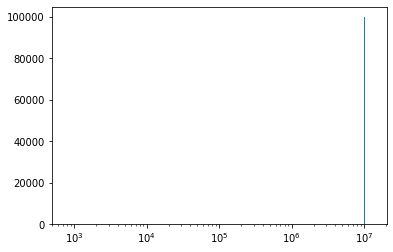

In [12]:
fig, axe = plt.subplots()
axe.hist(Ndist, bins=Nbins)
axe.set_xscale('log')

In [13]:
rdist

array([0.96121596, 1.01184976, 0.96070799, ..., 0.89870244, 1.00649549,
       0.99336092])

In [14]:
ndays = 20
ts = np.linspace(0, ndays, 101)
B = np.full((ts.size, Nbins.size-1), np.nan)
C = {}
for i, t in enumerate(ts):
    Ndist = logistic(t=t, r=rdist, K=1e7)
    C[t] = Ndist
    B[i,:] = np.histogram(Ndist, bins=Nbins, density=False)[0]

In [15]:
B

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

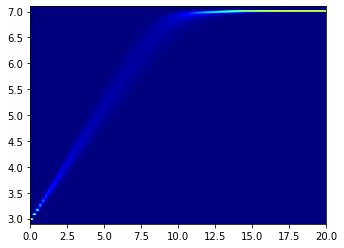

In [16]:
fig, axe = plt.subplots()
axe.imshow(B.T, origin='lower', extent=[0, 20, 2.9, 7.1], aspect=3.5, cmap="jet")

In [17]:
df = pd.DataFrame(C)
#df = np.log10(df)

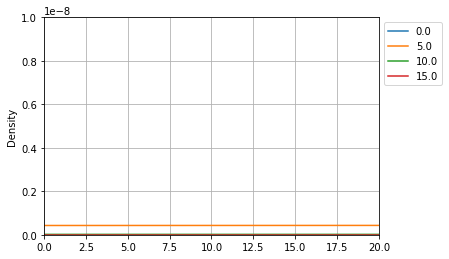

In [36]:
axe = df.iloc[:,0:100:25].plot(kind="kde")
#axe.set_xscale("log")
axe.set_xlim([0, 20])
axe.set_ylim([0, 1e-8])
axe.legend(loc="upper left", bbox_to_anchor=(1,1))
axe.grid()

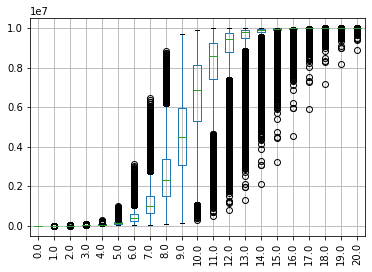

In [19]:
axe = df.iloc[:,0:101:5].boxplot(rot=90)
#axe.set_yscale("log")

In [20]:
r = np.linspace(0.5, 1.5, 1001)
ts = np.arange(0, 21, 2)

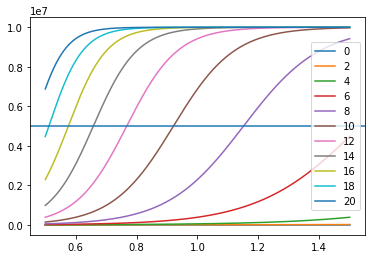

In [21]:
fig, axe = plt.subplots()
for t in ts:
    n = logistic(t=t, r=r, K=1e7)
    axe.plot(r, n, label=t)
axe.axhline(1e7/2)
axe.legend()

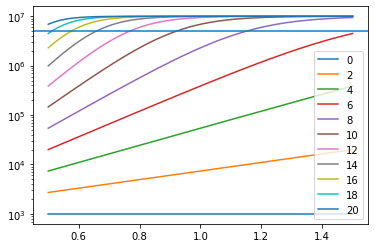

In [22]:
fig, axe = plt.subplots()
for t in ts:
    n = logistic(t=t, r=r, K=1e7)
    axe.semilogy(r, n, label=t)
axe.axhline(1e7/2)
axe.legend()

In [23]:
from scipy import signal, interpolate, optimize #import savgol_filter

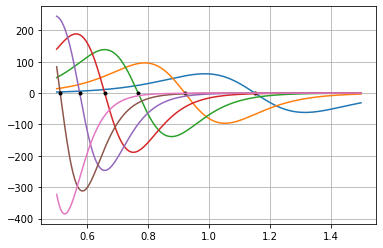

In [24]:
fig, axe = plt.subplots()
for t in ts[4:11]:
    n = logistic(t=t, r=r, K=1e7)
    dn = signal.savgol_filter(n, 51, 7, deriv=2)
    f = interpolate.interp1d(r, dn)
    r0 = np.log((1e7-1e3)/1e3)/t
    axe.plot(r, dn, label=t)
    if 0.5 <= r0 <= 1.5:
        axe.plot([r0], [f(r0)], ".", color="k")
axe.grid()
#axe.axhline(1e7/2)
#axe.legend()

1.5350400611626416
      fun: array([86.91321526])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4875.49148694])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1.5])
--------------------
1.1512800458719812
      fun: array([0.03252772])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.15519398])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 128
      nit: 4
     njev: 64
   status: 2
  success: False
        x: array([1.151])
--------------------
0.9210240366975849
      fun: array([0.00097274])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([1240.64727113])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 94
      nit: 3
     njev: 47
   status: 2
  success: False
        x: array([0.921])
--------------------
0.7675200305813208
      fun: array([0.04802943])
 hess_inv: <1x1 LbfgsInvHess

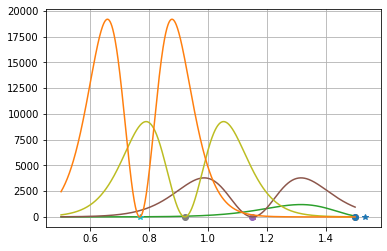

In [25]:
fig, axe = plt.subplots()
for t in ts[3:7]:
    n = logistic(t=t, r=r, K=1e7)
    dn = signal.savgol_filter(n, 51, 7, deriv=2)
    #x = np.where(np.diff(np.signbit(dn)))[0]
    f = interpolate.interp1d(r, dn**2)
    r0 = np.log((1e7-1e3)/1e3)/t
    axe.plot([r0], [0], "*")
    s = optimize.minimize(lambda x: f(x), r0, bounds=[(0.50, 1.50)], tol=1e-8)
    print(r0)
    print(s)
    print("-"*20)
    axe.plot([s.x[0]], [0], "o")
    axe.plot(r, f(r), label=t)
axe.grid()
#axe.axhline(1e7/2)
#axe.legend()

In [26]:
f(0.9)

array(17947.95883567)

In [27]:
r

array([0.5  , 0.501, 0.502, ..., 1.498, 1.499, 1.5  ])